In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Setup logging with some hacks to work in the notebook.
import logging
import sys
logger = logging.getLogger()
logger.handlers[0].stream = sys.stdout
logger.setLevel(logging.INFO)

import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
from math import sqrt
from skimage.transform import resize

import sys; sys.path.append('../')
from src.models.unet_jocic import UNet

logger.info('Done')

INFO:root:Done


Using TensorFlow backend.


In [13]:
model = UNet()
model.config['data_path'] = '../data'
model.load_data()
model.compile()
model.net.load_weights('../checkpoints/unet_binary.net')
logger.info('Done')

INFO:load_data:Reading images from ../data.
INFO:load_data:Images: (30, 512, 512), labeld: (30, 512, 512)
INFO:load_data:Images mean: 126.16, std: 44.02
INFO:root:Done


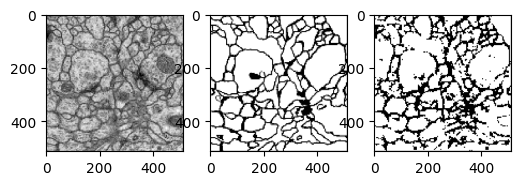

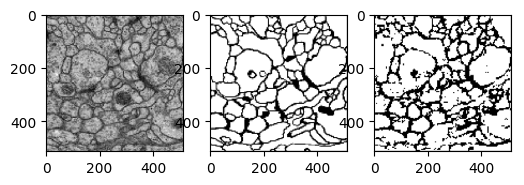

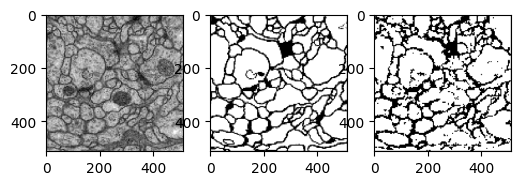

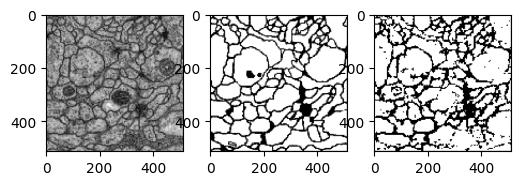

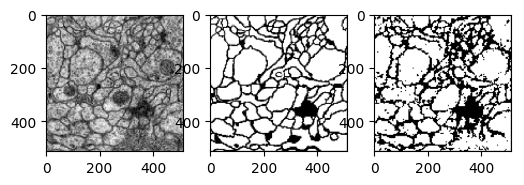

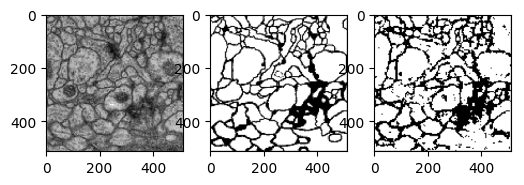

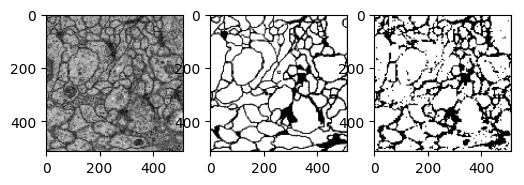

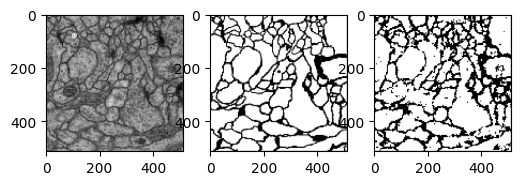

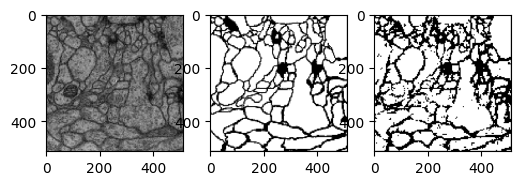

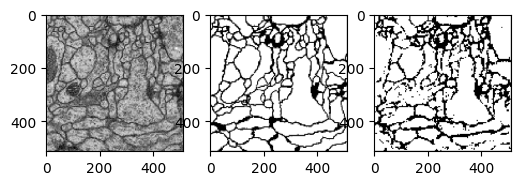

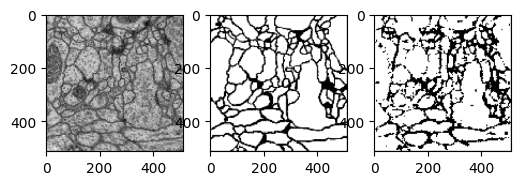

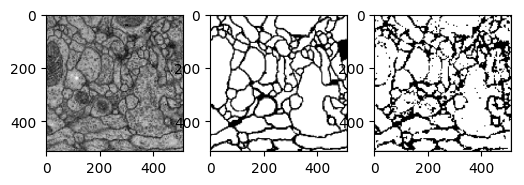

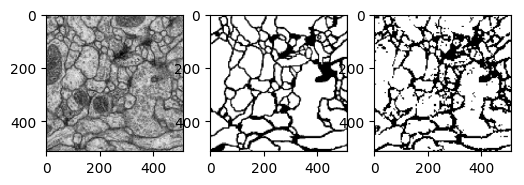

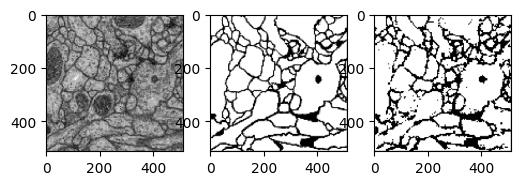

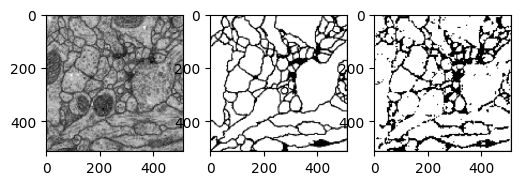

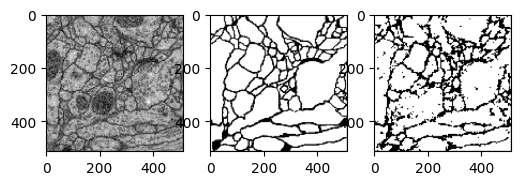

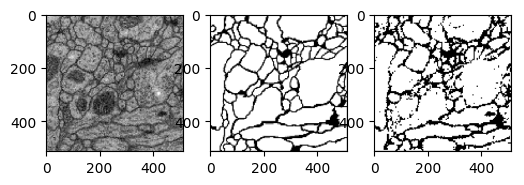

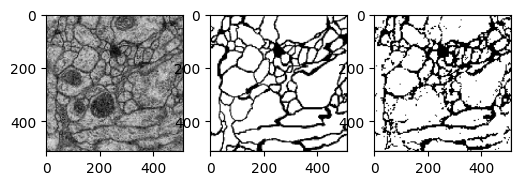

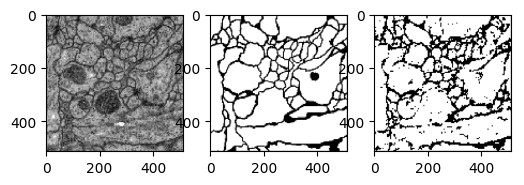

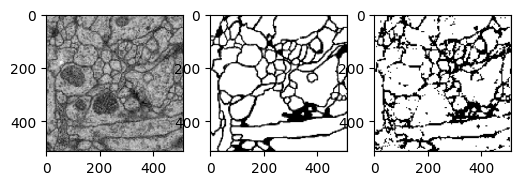

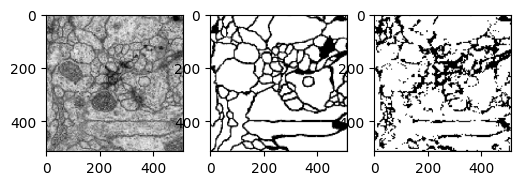

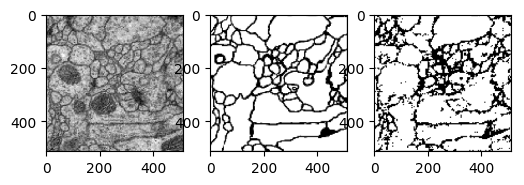

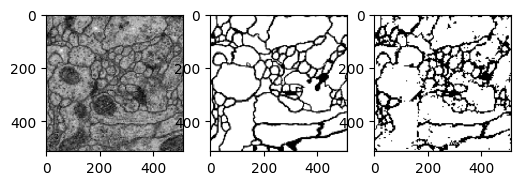

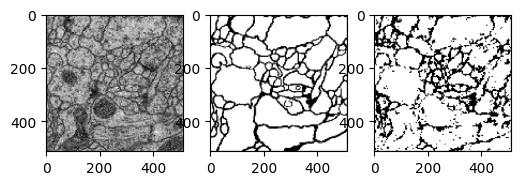

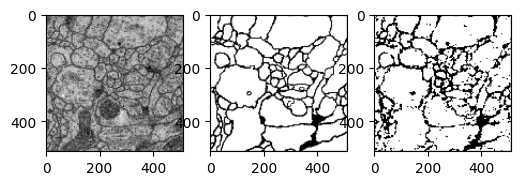

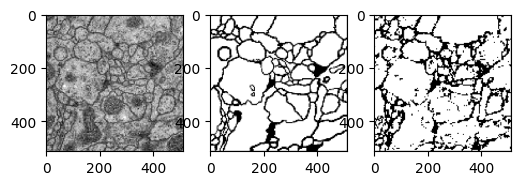

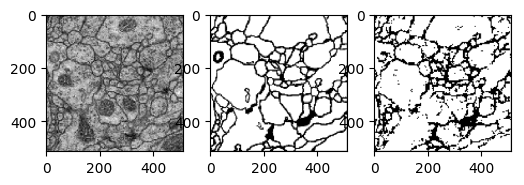

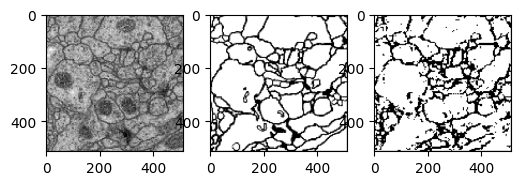

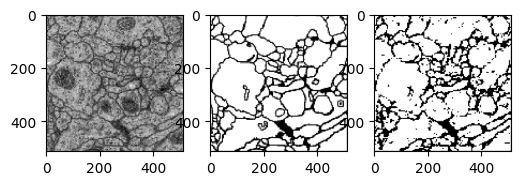

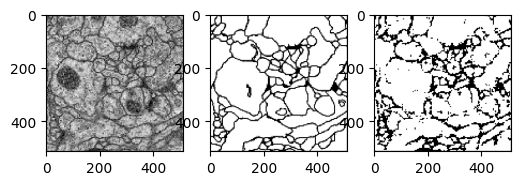

In [29]:
# Plot predictions on the training data.
data_gen = model.batch_gen(imgs=model.imgs, msks=model.msks, batch_size=1)

for img_batch, msk_batch in data_gen:
    prd_batch = model.net.predict(img_batch)
    img, msk, prd = img_batch[0], msk_batch[0], prd_batch[0].round()
    img, msk, prd = resize(img,(512,512)), resize(msk,(512,512)), resize(prd,(512,512))
    r = c = int(sqrt(img.size))
    fig,_ = plt.subplots(nrows=1, ncols=3)
    fig.axes[0].imshow(img.reshape(r,c), cmap='gray')
    fig.axes[1].imshow(msk.reshape(r,c), cmap='gray')
    fig.axes[2].imshow(prd.reshape(r,c), cmap='gray')
    plt.show()

In [13]:
# Plot submission images and predictions.
imgs_test = tiff.imread('../data/test-volume.tif')
msks_test = tiff.imread('../checkpoints/unet_binary.submission.tif')

for img, msk in zip(imgs_test, msks_test):
    fig, _ = plt.subplots(nrows=1, ncols=2)
    fig.axes[0].imshow(img, cmap='gray')
    fig.axes[0].set_title('Test Image')
    fig.axes[1].imshow(msk.round(), cmap='gray')
    fig.axes[1].set_title('Prediction')
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/dev/isbi-2012/checkpoints/unet_binary.submission.tif'